In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\reyha\Desktop\data science class\podcast dataset\podcast_dataset.csv")

In [3]:
data

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Healthy Living,Episode 77,99.25,Health,21.37,Thursday,Night,70.22,3,Positive,55.158695
1,Mystery Matters,Episode 6,19.43,True Crime,47.19,Friday,Evening,75.15,1,Neutral,7.686559
2,Current Affairs,Episode 1,117.03,News,96.33,Sunday,Night,57.95,3,Neutral,110.064645
3,Mystery Matters,Episode 38,16.97,True Crime,25.73,Monday,Night,24.19,0,Positive,12.000380
4,Humor Hub,Episode 73,83.48,Comedy,76.69,Tuesday,Afternoon,42.31,3,Positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52495,Home & Living,Episode 17,24.81,Lifestyle,66.15,Monday,Evening,98.63,1,Neutral,20.573795
52496,Melody Mix,Episode 9,92.15,Music,89.61,Saturday,Night,25.82,2,Negative,76.198459
52497,Comedy Corner,Episode 24,112.27,Comedy,26.33,Saturday,Night,55.29,0,Neutral,107.602135
52498,Business Briefs,Episode 85,NaN,Business,41.47,Wednesday,Afternoon,33.58,0,Neutral,17.220998


In [4]:
data.drop(columns=["Podcast_Name","Episode_Title"],inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Episode_Length_minutes       47254 non-null  float64
 1   Genre                        52500 non-null  object 
 2   Host_Popularity_percentage   52500 non-null  float64
 3   Publication_Day              52500 non-null  object 
 4   Publication_Time             52500 non-null  object 
 5   Guest_Popularity_percentage  47242 non-null  float64
 6   Number_of_Ads                52500 non-null  int64  
 7   Episode_Sentiment            52500 non-null  object 
 8   Listening_Time_minutes       47105 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.6+ MB


In [6]:
data.shape

(52500, 9)

array([[<Axes: title={'center': 'Episode_Length_minutes'}>,
        <Axes: title={'center': 'Host_Popularity_percentage'}>],
       [<Axes: title={'center': 'Guest_Popularity_percentage'}>,
        <Axes: title={'center': 'Number_of_Ads'}>],
       [<Axes: title={'center': 'Listening_Time_minutes'}>, <Axes: >]],
      dtype=object)

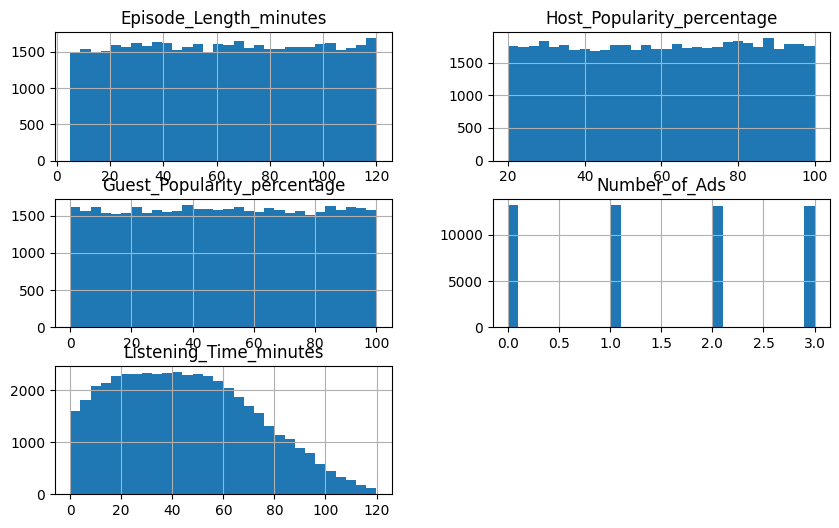

In [7]:
data.hist(bins=30,figsize=(10,6))

In [8]:
data.columns

Index(['Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage',
       'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage',
       'Number_of_Ads', 'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [9]:
from sklearn.impute import SimpleImputer,KNNImputer

In [10]:
data.isna().sum()

Episode_Length_minutes         5246
Genre                             0
Host_Popularity_percentage        0
Publication_Day                   0
Publication_Time                  0
Guest_Popularity_percentage    5258
Number_of_Ads                     0
Episode_Sentiment                 0
Listening_Time_minutes         5395
dtype: int64

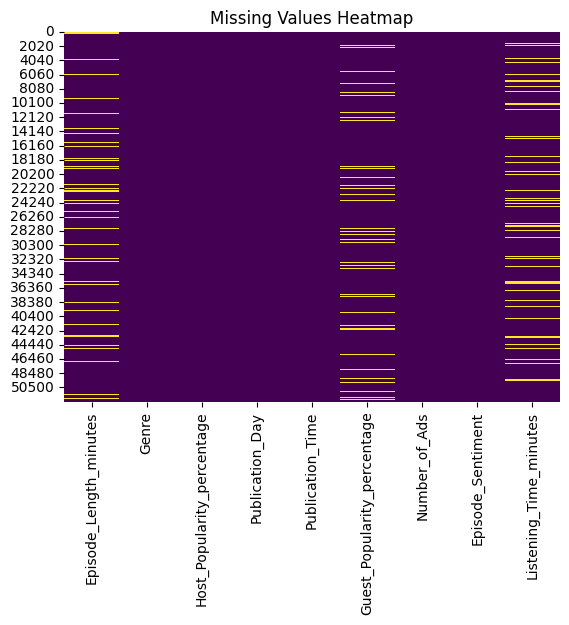

In [11]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
object_col=data.select_dtypes(include="object").columns
for col in object_col:
    print(data[col].isna().sum())
    print((data[col]=="").sum())
    print(data[col].str.lower().isin(['missing', 'none', 'null']).sum())

    

0
0
0
0
0
0
0
0
0
0
0
0


In [13]:
numeric_col = data.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_col:
    print((data[col]<0).sum())
    


0
0
0
0
0


In [14]:
for col in numeric_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f" {col}: {len(outliers)}")

 Episode_Length_minutes: 0
 Host_Popularity_percentage: 0
 Guest_Popularity_percentage: 0
 Number_of_Ads: 0
 Listening_Time_minutes: 0


In [15]:
data.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,47254.000000,52500.000000,47242.000000,52500.000000,47105.000000
mean,62.853491,60.163949,50.053434,1.497962,45.560293
std,33.137428,23.158567,28.884997,1.117412,27.182454
min,5.000000,20.000000,0.010000,0.000000,0.000000
25%,34.300000,40.000000,25.030000,0.000000,23.286442
50%,62.870000,60.300000,50.035000,1.000000,43.555490
75%,91.550000,80.310000,75.100000,2.000000,64.953793
max,120.000000,100.000000,100.000000,3.000000,119.970000


In [16]:
simple_imp=SimpleImputer(missing_values=np.nan,strategy="mean")

In [17]:
simple_imp.fit(data[numeric_col])

SimpleImputer()

In [18]:
data[numeric_col]=simple_imp.transform(data[numeric_col])

In [19]:
data.isna().sum()

Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [20]:
data.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,62.853491,60.163949,50.053434,1.497962,45.560293
std,31.438222,23.158567,27.400366,1.117412,25.747913
min,5.000000,20.000000,0.010000,0.000000,0.000000
25%,37.400000,40.000000,27.880000,0.000000,25.689765
50%,62.853491,60.300000,50.053434,1.000000,45.560293
75%,88.380000,80.310000,72.210000,2.000000,62.227379
max,120.000000,100.000000,100.000000,3.000000,119.970000


array([[<Axes: title={'center': 'Episode_Length_minutes'}>,
        <Axes: title={'center': 'Host_Popularity_percentage'}>],
       [<Axes: title={'center': 'Guest_Popularity_percentage'}>,
        <Axes: title={'center': 'Number_of_Ads'}>],
       [<Axes: title={'center': 'Listening_Time_minutes'}>, <Axes: >]],
      dtype=object)

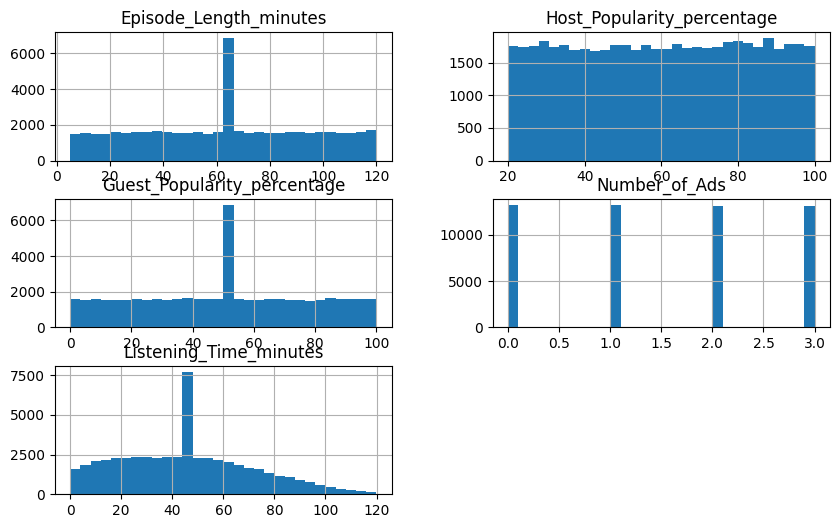

In [21]:
data.hist(bins=30,figsize=(10,6))

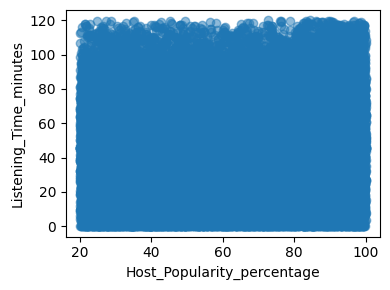

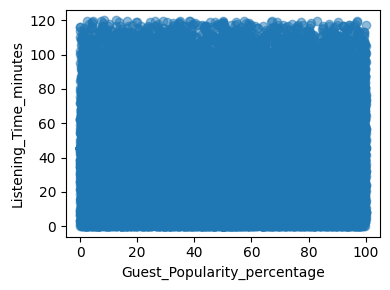

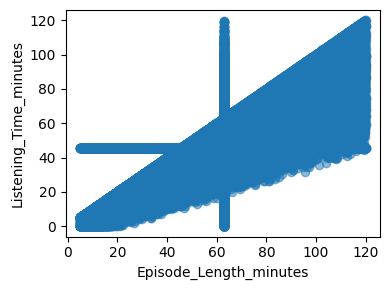

In [22]:
columns={"Episode_Length_minutes","Host_Popularity_percentage","Guest_Popularity_percentage"}

for col in columns:
    plt.figure(figsize=(4,3))
    plt.scatter(data[col],data["Listening_Time_minutes"],alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Listening_Time_minutes")
    plt.tight_layout()
    plt.show()



In [76]:
data["Listening_Time_minutes"].max()

4.795542580971757

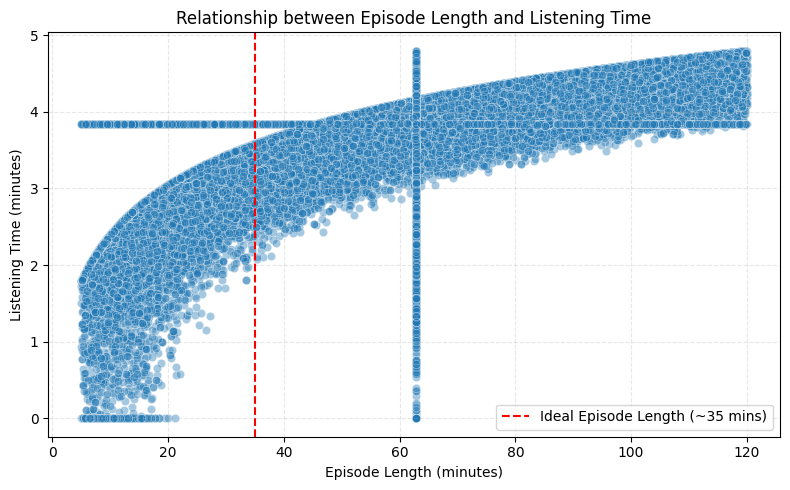

In [83]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x="Episode_Length_minutes",
    y="Listening_Time_minutes",
    alpha=0.4,
)  

plt.axvline(x=35, color='red', linestyle='--', label='Ideal Episode Length (~35 mins)')
plt.title("Relationship between Episode Length and Listening Time")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Listening Time (minutes)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
object_col=data.select_dtypes(include="object").columns
for col in object_col:
    print(data[col].unique())
    

['Health' 'True Crime' 'News' 'Comedy' 'Business' 'Lifestyle' 'Technology'
 'Music' 'Sports' 'Education']
['Thursday' 'Friday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Saturday']
['Night' 'Evening' 'Afternoon' 'Morning']
['Positive' 'Neutral' 'Negative']


In [24]:
object=data.select_dtypes(include="object").values

In [25]:
data.select_dtypes(include="object").nunique()

Genre                10
Publication_Day       7
Publication_Time      4
Episode_Sentiment     3
dtype: int64

In [26]:
genre_mean_map=data.groupby("Genre")["Listening_Time_minutes"].mean()
data["Genre"]=data["Genre"].map(genre_mean_map)

In [27]:
sentiment_order={
    'Positive':2,
    'Neutral':1,
    'Negative':0}
data["Episode_Sentiment"]=data["Episode_Sentiment"].map(sentiment_order)

In [28]:
from sklearn.preprocessing import OneHotEncoder


columns_to_encode = ['Publication_Day', "Publication_Time" ,'Number_of_Ads']


encoder = OneHotEncoder(drop="first", sparse_output=False)


encoded_array = encoder.fit_transform(data[columns_to_encode])


encoded_columns = encoder.get_feature_names_out(columns_to_encode)


encoded_data = pd.DataFrame(encoded_array, columns=encoded_columns, index=data.index)


data = pd.concat([data.drop(columns=columns_to_encode), encoded_data], axis=1)


In [29]:
data

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Guest_Popularity_percentage,Episode_Sentiment,Listening_Time_minutes,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Number_of_Ads_1.0,Number_of_Ads_2.0,Number_of_Ads_3.0
0,99.250000,45.396164,21.37,70.22,2,55.158695,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,19.430000,46.448864,47.19,75.15,1,7.686559,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,117.030000,44.734656,96.33,57.95,1,110.064645,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,16.970000,46.448864,25.73,24.19,2,12.000380,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,83.480000,44.632225,76.69,42.31,2,45.560293,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,24.810000,45.104636,66.15,98.63,1,20.573795,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
52496,92.150000,46.164558,89.61,25.82,0,76.198459,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
52497,112.270000,44.632225,26.33,55.29,1,107.602135,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52498,62.853491,45.840440,41.47,33.58,1,17.220998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data["Listening_Time_minutes"]=np.log1p(data["Listening_Time_minutes"])

<Axes: >

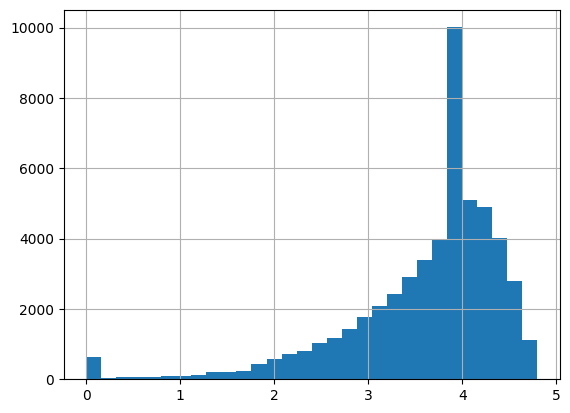

In [31]:
data["Listening_Time_minutes"].hist(bins=30)

In [32]:
data.columns

Index(['Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage',
       'Guest_Popularity_percentage', 'Episode_Sentiment',
       'Listening_Time_minutes', 'Publication_Day_Monday',
       'Publication_Day_Saturday', 'Publication_Day_Sunday',
       'Publication_Day_Thursday', 'Publication_Day_Tuesday',
       'Publication_Day_Wednesday', 'Publication_Time_Evening',
       'Publication_Time_Morning', 'Publication_Time_Night',
       'Number_of_Ads_1.0', 'Number_of_Ads_2.0', 'Number_of_Ads_3.0'],
      dtype='object')

In [33]:
x=data.drop(columns=["Listening_Time_minutes"])
y=data["Listening_Time_minutes"]

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
columns_to_scale = [
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',"Genre","Episode_Sentiment"
]
scaler=StandardScaler()
x_scaled = x.copy()
x_scaled[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

In [36]:
scaled_data=pd.DataFrame(x_scaled,columns=x.columns,index=x.index)

In [37]:
scaled_data

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Guest_Popularity_percentage,Episode_Sentiment,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Number_of_Ads_1.0,Number_of_Ads_2.0,Number_of_Ads_3.0
0,1.157726e+00,-0.215366,-1.675161,0.736003,1.221927,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.381246e+00,1.165965,-0.560228,0.915930,-0.002332,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.723285e+00,-1.083384,1.561685,0.288195,-0.002332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.459495e+00,1.165965,-1.486892,-0.943917,1.221927,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6.561028e-01,-1.217791,0.713611,-0.282606,1.221927,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,-1.210115e+00,-0.597903,0.258484,1.772861,-0.002332,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
52496,9.318844e-01,0.792905,1.271509,-0.884429,-1.226591,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
52497,1.571876e+00,-1.217791,-1.460983,0.191115,-0.002332,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52498,-2.260145e-16,0.367603,-0.807223,-0.601218,-0.002332,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
x_train, x_temp, y_train, y_temp = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [40]:
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [41]:
#linear regrassion(basilie)
model_lr=LinearRegression()
linear=model_lr.fit(x_train,y_train)

In [42]:
y_train_pred = model_lr.predict(x_train)
y_val_pred=model_lr.predict(x_val)



In [43]:

y_train_pred_orig = np.expm1(y_train_pred)
y_val_pred_orig = np.expm1(y_val_pred)
y_train_orig = np.expm1(y_train)
y_val_orig = np.expm1(y_val)

rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
train_r2 = r2_score(y_train_orig, y_train_pred_orig)

rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_val_pred_orig))
val_r2 = r2_score(y_val_orig, y_val_pred_orig)

print(f"Train RMSE: {rmse_train:.2f} minutes")
print(f"Train R² : {train_r2:.4f}\n")
print(f"Validation RMSE: {rmse_val:.2f} minutes")
print(f"Validation R²: {val_r2:.4f}")


Train RMSE: 17.56 minutes
Train R² : 0.5345

Validation RMSE: 17.61 minutes
Validation R²: 0.5282


In [44]:
np.expm1(y).mean()

45.56029278803001

In [45]:
len(y_train_pred_orig)


36750

In [46]:
y_train_orig .mean()

45.62130649286324

In [47]:
y_train_pred_orig.mean()


43.483120636104644

In [48]:
y_test_pred = model_lr.predict(x_test)

In [49]:
y_test_pred_orig = np.expm1(y_test_pred)

y_test_orig = np.expm1(y_test)


In [50]:
rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))
test_r2 = r2_score(y_test_orig, y_test_pred_orig)

print(f"Test RMSE: {rmse_test:.2f} minutes")
print(f"Test R²: {test_r2:.4f}")

Test RMSE: 17.72 minutes
Test R²: 0.5308


In [51]:
y_test_pred_orig = np.expm1(y_test_pred)

In [52]:
y_test_orig.mean()

45.173232753717414

In [53]:
y_test_pred_orig.mean()

43.33214625887008

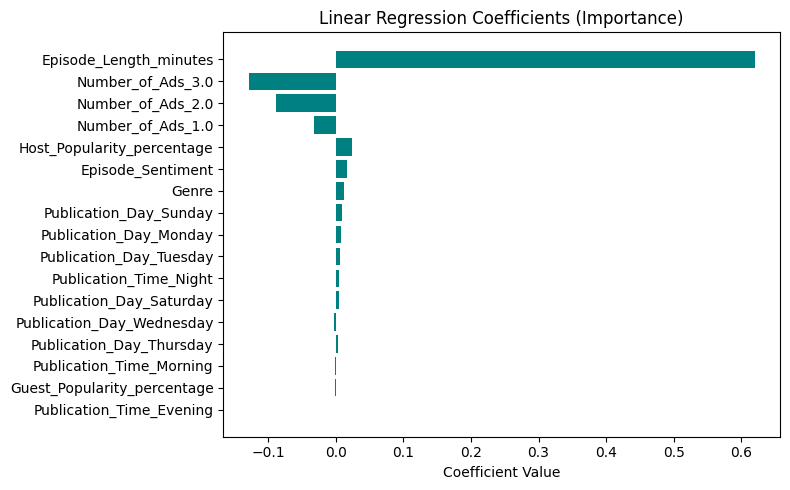

In [54]:
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model_lr.coef_
}).sort_values(by='Coefficient', key=np.abs, ascending=False)


plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients (Importance)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [55]:
coef_df

,Feature,Coefficient
0,Episode_Length_minutes,0.619989
16,Number_of_Ads_3.0,-0.128965
15,Number_of_Ads_2.0,-0.088729
14,Number_of_Ads_1.0,-0.032233
2,Host_Popularity_percentage,0.023996
4,Episode_Sentiment,0.017146
1,Genre,0.012231
7,Publication_Day_Sunday,0.008777
5,Publication_Day_Monday,0.007762
9,Publication_Day_Tuesday,0.006338


In [56]:
z=data.groupby("Genre")["Listening_Time_minutes"].mean().sort_values(ascending=False)


In [57]:
z

Genre
47.077444    3.644014
46.448864    3.620022
46.164558    3.619396
45.840440    3.617482
45.253935    3.600846
45.009519    3.598121
45.396164    3.594664
45.104636    3.590614
44.734656    3.590410
44.632225    3.574189
Name: Listening_Time_minutes, dtype: float64

In [58]:
#lasso regression
from sklearn.linear_model import Lasso

In [59]:
lasso=Lasso(alpha=0.1,random_state=42)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1, random_state=42)

In [60]:
y_train_pred = lasso.predict(x_train)
y_val_pred = lasso.predict(x_val)
y_test_pred = lasso.predict(x_test)
y_train_pred_orig = np.expm1(y_train_pred)
y_val_pred_orig = np.expm1(y_val_pred)
y_train_orig = np.expm1(y_train)
y_val_orig = np.expm1(y_val)

In [61]:
rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
train_r2 = r2_score(y_train_orig, y_train_pred_orig)

rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_val_pred_orig))
test_r2 = r2_score(y_val_orig, y_val_pred_orig)

rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))
test_r2 = r2_score(y_test_orig, y_test_pred_orig)




In [62]:
print(f"Train RMSE: {rmse_train:.2f} minutes")
print(f"Train R²: {train_r2:.4f}")

print(f"val RMSE: {rmse_val:.2f} minutes")
print(f"val R²: {val_r2:.4f}")

print(f"Test RMSE: {rmse_test:.2f} minutes")
print(f"Test R²: {test_r2:.4f}")








Train RMSE: 16.61 minutes
Train R²: 0.5839
val RMSE: 16.67 minutes
val R²: 0.5282
Test RMSE: 17.72 minutes
Test R²: 0.5308


In [63]:
#feature extraction importance
feature_name=x_train.columns
lasso_coef=lasso.coef_
coef_df=pd.DataFrame({

  "Feature": feature_name,
  "Coefficient": lasso_coef
}
    
)


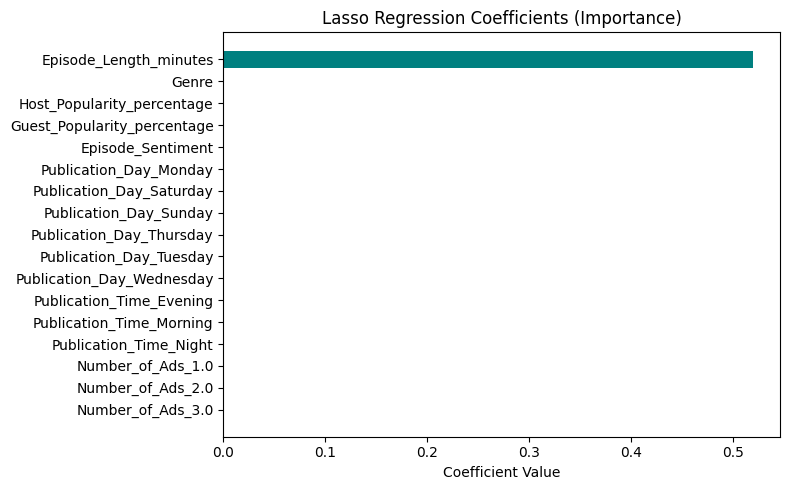

In [64]:
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients (Importance)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [65]:
coef_df

,Feature,Coefficient
0,Episode_Length_minutes,0.520192
1,Genre,0.000000
2,Host_Popularity_percentage,0.000000
3,Guest_Popularity_percentage,-0.000000
4,Episode_Sentiment,0.000000
5,Publication_Day_Monday,0.000000
6,Publication_Day_Saturday,-0.000000
7,Publication_Day_Sunday,0.000000
8,Publication_Day_Thursday,-0.000000
9,Publication_Day_Tuesday,0.000000


In [66]:
from sklearn.linear_model import Ridge

In [67]:
ridge = Ridge(alpha=5,random_state=42)
ridge.fit(x_train, y_train)

Ridge(alpha=5, random_state=42)

In [68]:


y_train_pred = ridge.predict(x_train)
y_val_pred = ridge.predict(x_val)
y_test_pred = ridge.predict(x_test)
y_train_pred_orig = np.expm1(y_train_pred)
y_val_pred_orig = np.expm1(y_val_pred)
y_train_orig = np.expm1(y_train)
y_val_orig = np.expm1(y_val)

In [69]:
rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
train_r2 = r2_score(y_train_orig, y_train_pred_orig)

rmse_val = np.sqrt(mean_squared_error(y_val_orig, y_val_pred_orig))
test_r2 = r2_score(y_val_orig, y_val_pred_orig)

rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))
test_r2 = r2_score(y_test_orig, y_test_pred_orig)


In [70]:
print(f"Train RMSE: {rmse_train:.2f} minutes")
print(f"Train R²: {train_r2:.4f}")

print(f"val RMSE: {rmse_val:.2f} minutes")
print(f"val R²: {val_r2:.4f}")

print(f"Test RMSE: {rmse_test:.2f} minutes")

Train RMSE: 17.56 minutes
Train R²: 0.5346
val RMSE: 17.60 minutes
val R²: 0.5282
Test RMSE: 17.72 minutes


In [71]:
feature_name=x_train.columns
ridge_coef=ridge.coef_
coef_df=pd.DataFrame({

  "Feature": feature_name,
  "Coefficient": ridge_coef
}
    
)

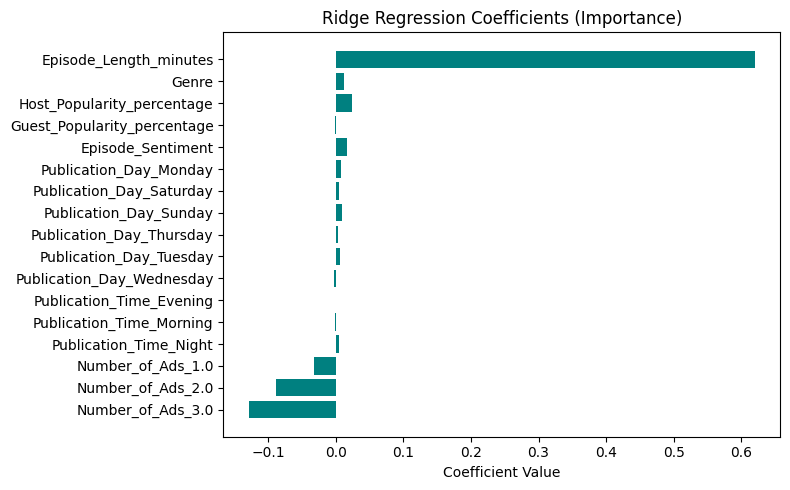

In [75]:
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients (Importance)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [72]:
coef_df

,Feature,Coefficient
0,Episode_Length_minutes,0.619904
1,Genre,0.012230
2,Host_Popularity_percentage,0.023993
3,Guest_Popularity_percentage,-0.001059
4,Episode_Sentiment,0.017144
5,Publication_Day_Monday,0.007726
6,Publication_Day_Saturday,0.004392
7,Publication_Day_Sunday,0.008740
8,Publication_Day_Thursday,0.002936
9,Publication_Day_Tuesday,0.006306


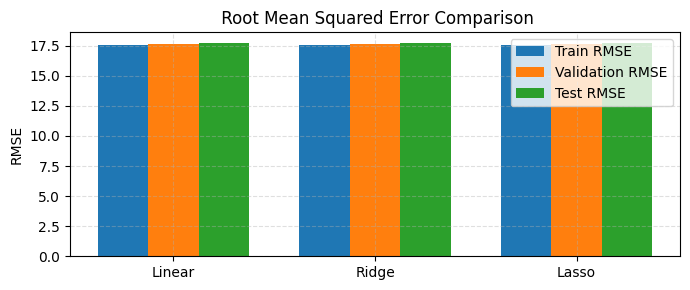

In [73]:

models = ['Linear', 'Ridge', 'Lasso']

width = 0.25
x = np.arange(len(models))
plt.figure(figsize=(7, 3))
plt.bar(x - width, rmse_train, width, label='Train RMSE')
plt.bar(x, rmse_val, width, label='Validation RMSE')
plt.bar(x + width, rmse_test, width, label='Test RMSE')

plt.ylabel('RMSE')
plt.title(' Root Mean Squared Error Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

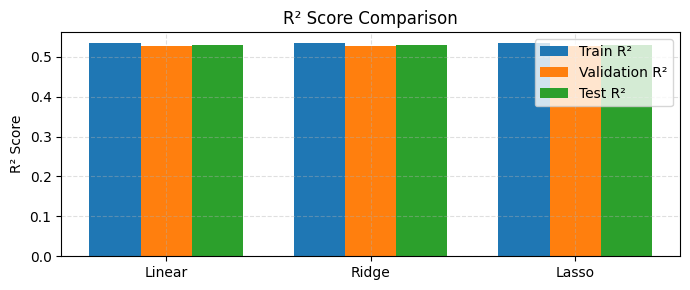

In [74]:
plt.figure(figsize=(7, 3))
plt.bar(x - width, train_r2, width, label='Train R²')
plt.bar(x, val_r2, width, label='Validation R²')
plt.bar(x + width, test_r2, width, label='Test R²')

plt.ylabel('R² Score')
plt.title('R² Score Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()